## Data Dictionary

**RowNumber** - Index for each customer in the dataset. </br>
**CustomerId** - A unique identifier for each customers. </br>
**Surname** - Customer's last name. </br>
**CreditScore** - A number between 300–850 that depicts a customer's creditworthiness.</br>
**Geography** - The geographical location of a customer. In this case, a customer's country of residence.</br>
**Gender** - Customer's gender.</br>
**Age** - Age of the customer.</br>
**Tenure** - Number of years a customer has been with the bank.</br>
**Balance** - A customer's bank account balance.</br>
**NumOfProduct** - Number of bank products/services a customer is using.</br>
**HasCrCard** - Whether customer has a credit card. (Yes=1, No=0).</br>
**IsActiveMember** - Whether customer actively uses bank account. (Yes=1, No=0).</br>
**EstimatedSalary** - Customer's estimated salary in dollars.</br>
**Exited** - Label assigned to each customer. 1 (Yes) if the customer closed the account, 0 (No) if otherwise.</br>

In [1]:
#  Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Import Data

In [2]:
df = pd.read_csv("Churn_Modelling.csv", index_col="RowNumber")
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Explore Data

In [3]:
# check number of records in the dataset
df.shape

(10000, 13)

In [4]:
# check for missing values and if dtypes matches column name
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


From the information given by the table above, there are no missing values in our dataset and the data types match the names used to describe the columns.

In [5]:
# check for duplicaltes
df.duplicated().sum()

0

In [6]:
# inspect categorical columns for inconsistency
print("Countries:", df["Geography"].unique())
print()
print("Genders:", df["Gender"].unique())

Countries: ['France' 'Spain' 'Germany']

Genders: ['Female' 'Male']


Both features seems to have consistent data points so there won't any need for cleaning
the features.

In [7]:
# calculate the summary statistics of the dataset
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


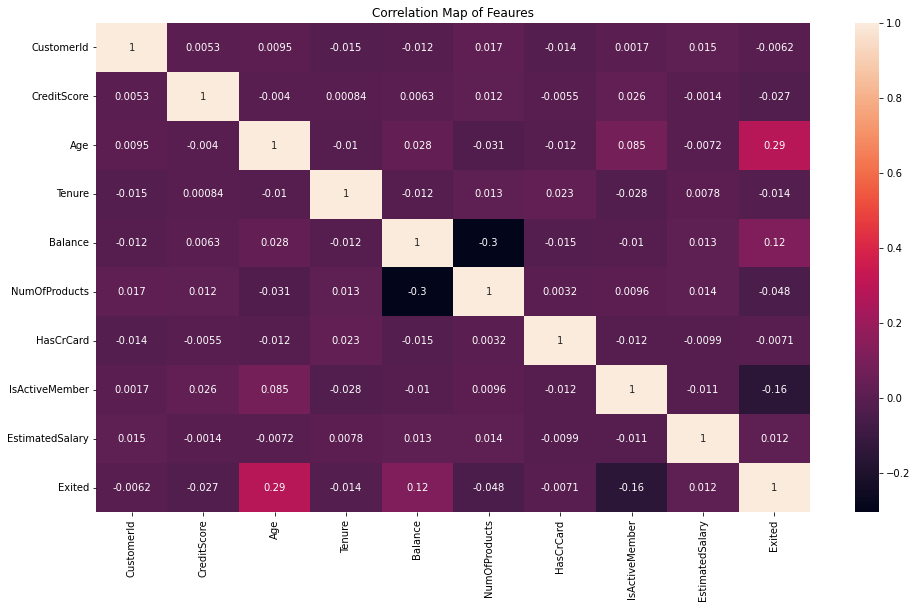

In [8]:
# check for any significant relationship between columns in the dataset
corr = df.select_dtypes("number").corr()
plt.figure(figsize=(16, 9))
sns.heatmap(corr, annot=True)
plt.title("Correlation Map of Feaures");

From the figure above, Age feauture appears to be the only feature with highest correlation with with Exited feature.

0    0.7963
1    0.2037
Name: Exited, dtype: float64


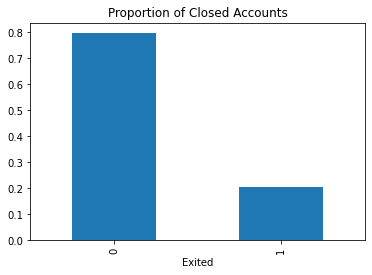

In [9]:
# check the proportion of customers that terminated their account
acc = df["Exited"].value_counts(normalize=True) # counts the number of customers that exited and those that did not
print(acc) # prints the percentage of customers that exited
acc.plot(kind="bar") # displays the number of customers that exited and those that did not
plt.xlabel("Exited")
plt.title("Proportion of Closed Accounts");

From the figure above, we can see that majority of the customers did not close their accounts. And approximately 20% of the customers eventually closed their accounts.

#### Credit Score

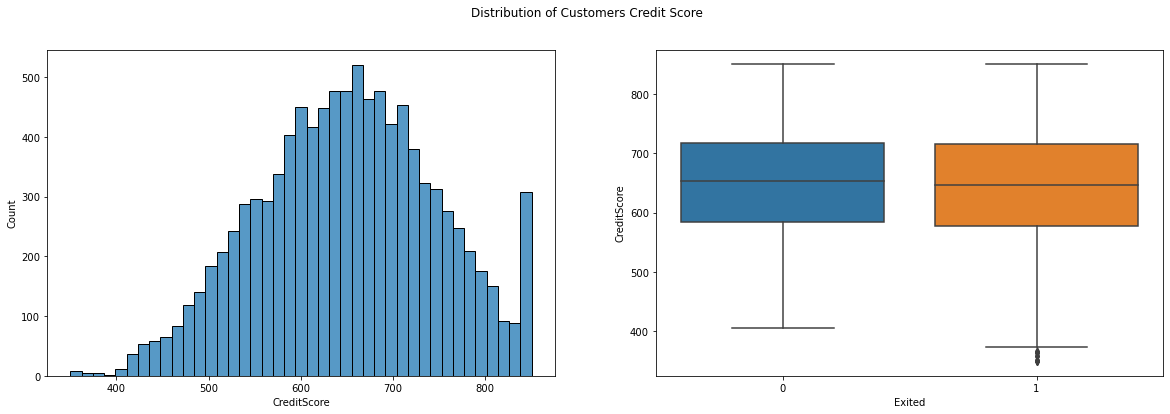

In [10]:
# examine the distribution of "CreditScore"
fig, axes=plt.subplots(1, 2,figsize=(20, 6))
sns.histplot(df, x="CreditScore", ax=axes[0])
sns.boxplot(x="Exited", y="CreditScore", data=df, ax=axes[1])
plt.suptitle("Distribution of Customers Credit Score");

From the histogram plot, the distribution of credit scores appears to be slightly skewed to the right, with the majority of customers having credit scores greater than 600. Also from the boxplot, the average credit score for customers who exited and those who did not is about 650, with customers who exited having a lower minimum credit score than those who did not. It can also been that the credit score appears to be normaly distributed for each class.

#### Age

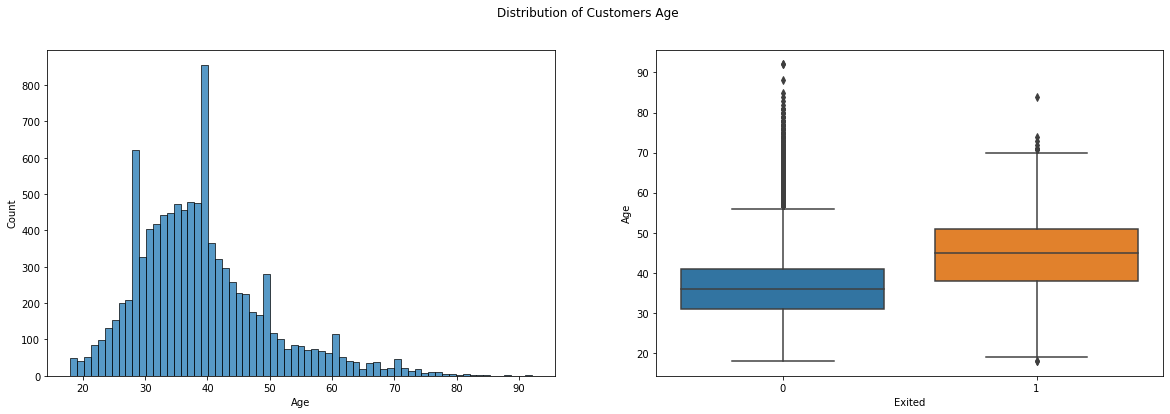

In [11]:
# Make distribution plot of "Age"
fig, axes=plt.subplots(1, 2,figsize=(20, 6))
sns.histplot(df, x="Age", ax=axes[0])
sns.boxplot(x="Exited", y="Age", data=df, ax=axes[1])
plt.suptitle("Distribution of Customers Age");

The figure above shows that customers are mostly under the age of 40. Those who did not close their accounts are on average 35 years old, whereas customers who did terminate their accounts are on average 45 years old. The box plot also appears to be normally distributed for both classes.

#### Balance

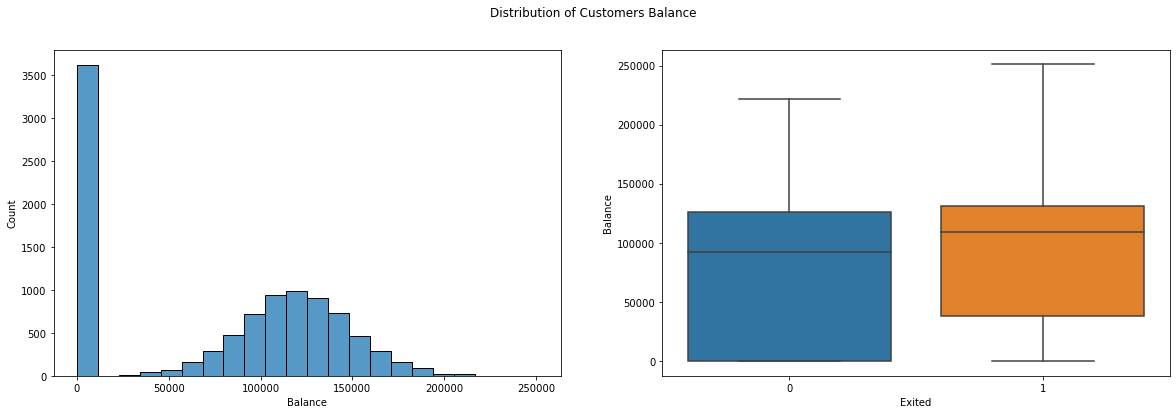

In [12]:
# make distribution plot of "Balance"
fig, axes=plt.subplots(1, 2,figsize=(20, 6))
sns.histplot(df, x="Balance", ax=axes[0])
sns.boxplot(x="Exited", y="Balance", data=df, ax=axes[1])
plt.suptitle("Distribution of Customers Balance");

From the figure above, it can be seen that around 3500 customers have no money in their bank accounts. The feature also appears to follow a normal distribution for both the positive and the negative class.

#### Customer's Salary

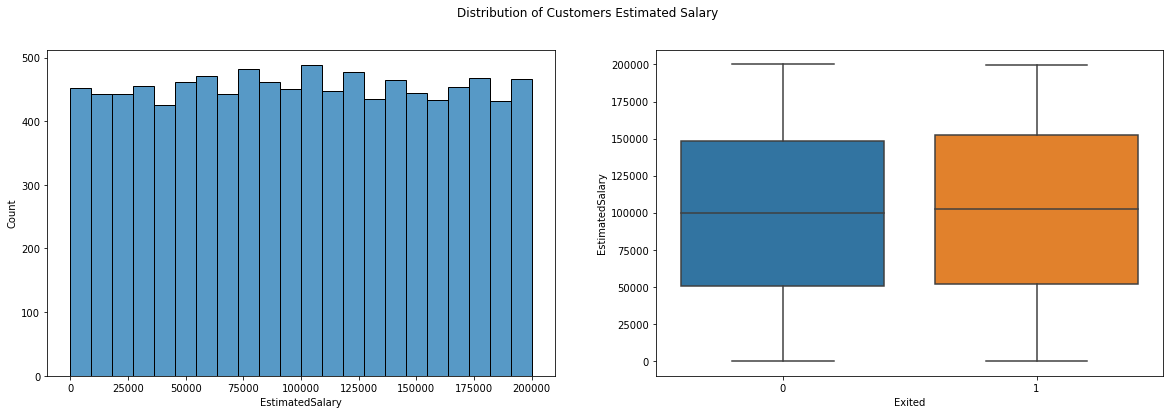

In [13]:
# distribution plot of "EstimatedSalary"
fig, axes=plt.subplots(1, 2,figsize=(20, 6))
sns.histplot(df, x="EstimatedSalary", ax=axes[0])
sns.boxplot(x="Exited", y="EstimatedSalary", data=df, ax=axes[1])
plt.suptitle("Distribution of Customers Estimated Salary");

The estimated salary of customers seem to be uniformly distributed with an average salary of 100,000 Euro. Also, the distribution of salary for the positive class also appears to be evenly distributed.

#### Number of Products

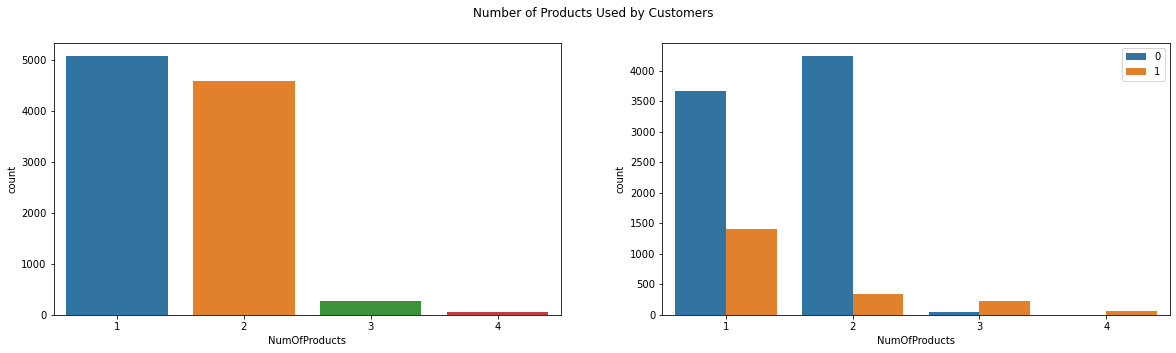

In [14]:
# make histogram plot of "NumofProducts"
fig, axes=plt.subplots(1, 2,figsize=(20, 5))
sns.countplot(x="NumOfProducts", data=df, ax=axes[0])
sns.countplot(x="NumOfProducts", data=df, hue="Exited", ax=axes[1]);
axes[1].legend(loc="best")
plt.suptitle("Number of Products Used by Customers");

From the figure above, it can bee seen that majority of customers use only one product. The figure also shows that most of the customers that closed here accounts used only one product. This implies that customers that use only one product are more likely to leave than those that use more than one product.

#### Has Credit Card

1    0.7055
0    0.2945
Name: HasCrCard, dtype: float64

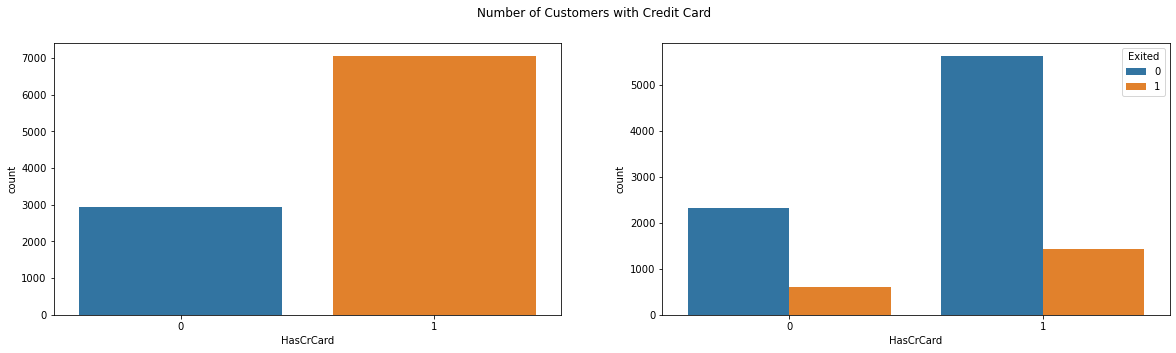

In [15]:
# make count plot of "HasCrCard"
fig, axes=plt.subplots(1, 2,figsize=(20, 5))
sns.countplot(x="HasCrCard", data=df, ax=axes[0])
sns.countplot(x="HasCrCard", data=df, hue="Exited", ax=axes[1])
plt.suptitle("Number of Customers with Credit Card");
df["HasCrCard"].value_counts(normalize=True)

In [16]:
# check the proportion of customers that had credit card and terminated their account
exit = df[df["Exited"]==1]
exit["HasCrCard"].value_counts(normalize=True)

1    0.699067
0    0.300933
Name: HasCrCard, dtype: float64

Approximately 70% of customers have a credit card. Around 20% of customers closed their accounts, and approximately 70% of them had a credit card.

#### Activity

1    0.5151
0    0.4849
Name: IsActiveMember, dtype: float64

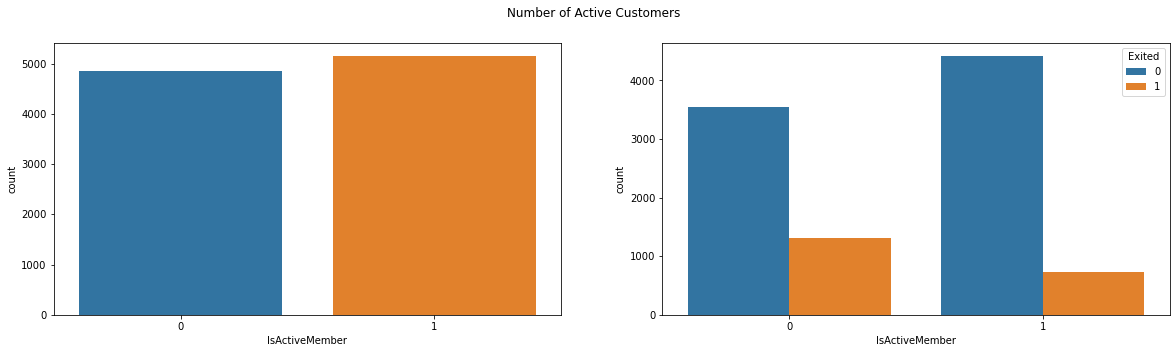

In [17]:
# make count plot of "IsActiveMember"
fig, axes=plt.subplots(1, 2,figsize=(20, 5))
sns.countplot(x="IsActiveMember", data=df, ax=axes[0])
sns.countplot(x="IsActiveMember", data=df, hue="Exited", ax=axes[1])
plt.suptitle("Number of Active Customers")
df["IsActiveMember"].value_counts(normalize=True)

In [18]:
# check the proportion of customers that were active and terminated their account
exit = df[df["Exited"]==1]
exit["IsActiveMember"].value_counts(normalize=True)

0    0.639175
1    0.360825
Name: IsActiveMember, dtype: float64

From the figure above, around half of the customers actively use their accounts with active users being about 52% of all customers. The figure also shows that the majority of customers who left were not active, approximately 64% of customers who left were inactive.

#### Tenure

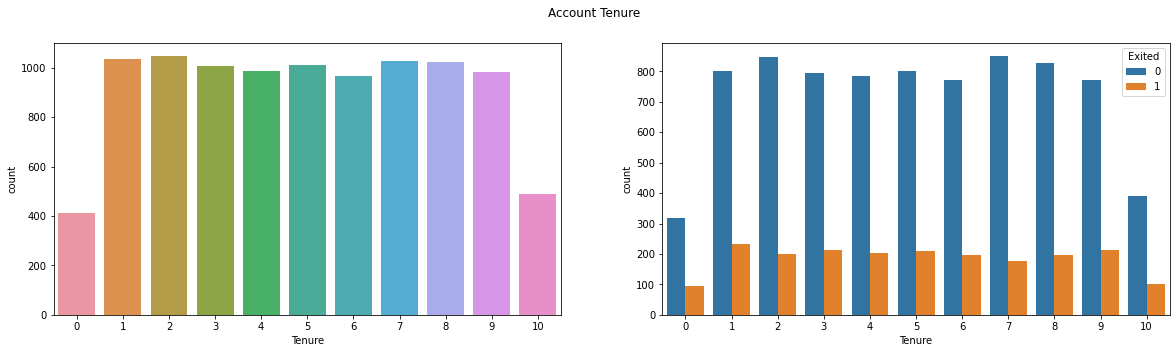

In [19]:
# make count plot plot of "Tenure"
fig, axes=plt.subplots(1, 2,figsize=(20, 5))
sns.countplot(x="Tenure", data=df, ax=axes[0])
sns.countplot(x="Tenure", data=df, hue="Exited", ax=axes[1])
plt.suptitle("Account Tenure");

The figure above shows that the number of years customers have been using their accounts appears to be uniformly distributed. It also shows that most of that customers that left have only been using their accounts for one year.

#### Country

In [20]:
# check the proportion of countries in the dataset
df["Geography"].value_counts(normalize=True)

France     0.5014
Germany    0.2509
Spain      0.2477
Name: Geography, dtype: float64

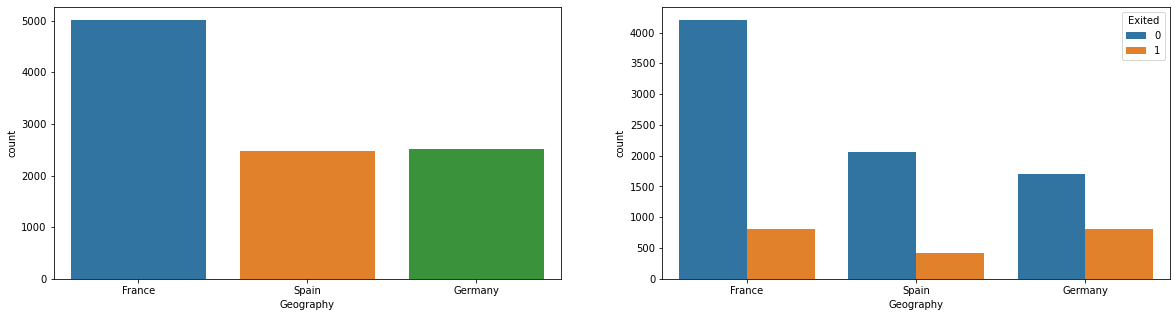

In [21]:
# make a count plot of "Country"
fig, axes=plt.subplots(1, 2,figsize=(20, 5))
sns.countplot(x="Geography", data=df, ax=axes[0])
sns.countplot(x="Geography", data=df, hue="Exited", ax=axes[1]);

In [22]:
# check the country that has hightest percentage of terminated accounts
exit = df[df["Exited"]==True]
exit["Geography"].value_counts(normalize=True)

Germany    0.399607
France     0.397644
Spain      0.202749
Name: Geography, dtype: float64

Approximately half of the customers are from France, 25% from Germany, and the remaining 25% are from Spain. The majority of customers who terminated their accounts are from France and Germany.

#### Gender

In [23]:
# check the proportion of male and female customers using the bank
df["Gender"].value_counts(normalize=True)

Male      0.5457
Female    0.4543
Name: Gender, dtype: float64

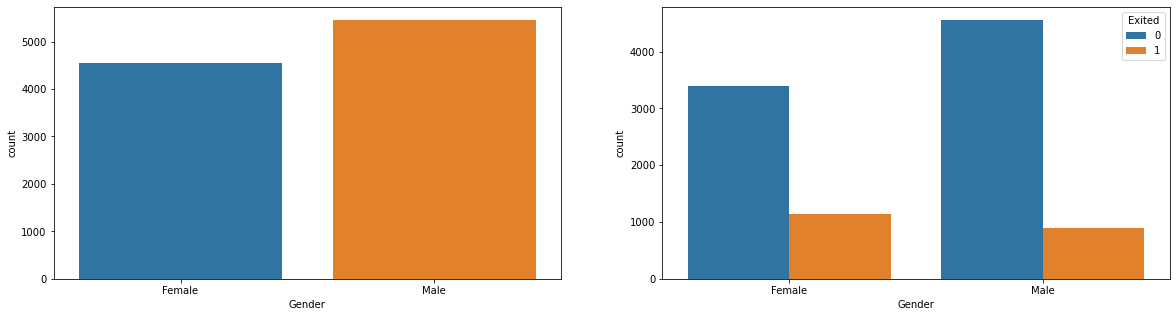

In [24]:
# make a count plot of "Gender"
fig, axes=plt.subplots(1, 2,figsize=(20, 5))
sns.countplot(x="Gender", data=df, ax=axes[0])
sns.countplot(x="Gender", data=df, hue="Exited", ax=axes[1]);

In [25]:
# check the percentage of male and female customers that terminated their account
exit = df[df["Exited"]==True]
exit["Gender"].value_counts(normalize=True)

Female    0.559156
Male      0.440844
Name: Gender, dtype: float64

The figure above shows that most of the bank's customers are male and most of the customers that left are female.

## Conclusion
Due to the non-linear relationship between features in the data set, a non-linear classification algorithm will be used to model the data set with recall score as the major performance metric for evaluating the model. Also, the class imbalance will be handled using a random over sampling method.